In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

import pandas as pd
import numpy as np


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We are using the California housing dataset from Google 

In [11]:
# add CSV data from two datadots
inputs = [pd.read_csv('./agent1/california_housing_train_agent1.csv'), pd.read_csv('./agent2/california_housing_train_agent2.csv')]

df = pd.concat(f for f in inputs)

In [13]:
# randomise my dataframe rows to remove any ordering in the data
df = df.sample(frac=1).reset_index(drop=True)


In [14]:
#NB Our data is at the city block level, so total_rooms represents the total number of rooms in that block.

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.20,37.43,22,3294,744,1337,655,5.2391,500001
1,-121.51,38.51,31,1595,217,542,236,6.6112,251600
2,-122.23,38.10,46,4143,895,2240,847,2.4201,92800
3,-118.96,34.30,16,3103,482,1567,467,6.9070,500001
4,-121.55,38.51,14,5490,851,2415,837,6.5253,216800
5,-122.54,37.88,30,4382,732,1775,745,6.7809,414400
6,-117.97,33.89,14,923,136,420,130,10.2252,462800
7,-117.29,34.14,52,1683,266,646,256,4.0481,97300
8,-121.98,37.97,26,2738,428,1316,430,5.2442,213200
9,-117.09,32.62,34,1576,364,1153,381,2.1955,129700


In [17]:
# check none of our data is NaN
df.isnull().any()


longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [35]:
# fig = plt.figure(figsize=(150,80))


In [51]:
# fig = sm.graphics.plot_regress_exog(housing_model, "total_rooms", fig=fig)
# fig

In [47]:
# from docs

X = df['total_rooms']  # predictor
Y = df['median_house_value']  # response
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     296.8
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           6.08e-66
Time:                        20:14:03   Log-Likelihood:            -2.2221e+05
No. Observations:               17000   AIC:                         4.444e+05
Df Residuals:                   16998   BIC:                         4.444e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.889e+05   1386.257    136.249      0.000    1.86e+05    1.92e+05
total_rooms     6.9694      0.405     17.227      0.000       6.176       7.762
==============================================================================
Omnibus:                     2048.651   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2865.772
Skew:                           0.989   Prob(JB):                         0.00
Kurtosis:                       3.369   Cond. No.                     5.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OK, this is a bad model :(

In [55]:
# from docs

X = df['population']  # predictor
Y = df['median_house_value']  # response
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

In [56]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     13.19
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           0.000282
Time:                        20:28:38   Log-Likelihood:            -2.2236e+05
No. Observations:               17000   AIC:                         4.447e+05
Df Residuals:                   16998   BIC:                         4.447e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.113e+05   1420.329    148.785      0.000    2.09e+05    2.14e+05
population    -2.8141      0.775     -3.632      0.000      -4.333      -1.296
==============================================================================
Omnibus:                     1940.535   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2674.637
Skew:                           0.961   Prob(JB):                         0.00
Kurtosis:                       3.285   Cond. No.                     2.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
R squared still low. Lets look at what's going on with visualisation.

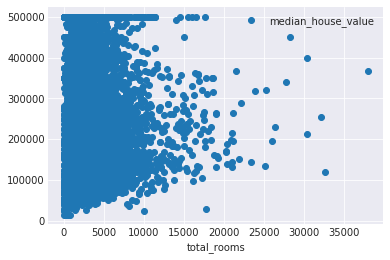

In [58]:
df.plot(x='total_rooms', y='median_house_value', style='o')


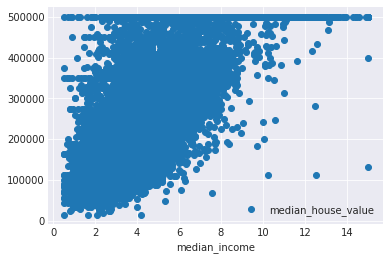

In [61]:
df.plot(x='median_income', y='median_house_value', style='o')
# 

In [62]:
X = df['median_income']  # predictor
Y = df['median_house_value']  # response
X = sm.add_constant(X)

model = sm.OLS(Y, X)
results = model.fit()

In [63]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                 1.561e+04
Date:                Mon, 25 Jun 2018   Prob (F-statistic):               0.00
Time:                        20:39:19   Log-Likelihood:            -2.1683e+05
No. Observations:               17000   AIC:                         4.337e+05
Df Residuals:                   16998   BIC:                         4.337e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.398e+04   1456.540     30.195      0.000    4.11e+04    4.68e+04
median_income  4.205e+04    336.616    124.932      0.000    4.14e+04    4.27e+04
==============================================================================
Omnibus:                     3498.846   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7667.558
Skew:                           1.190   Prob(JB):                         0.00
Kurtosis:                       5.272   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

let's add a column to df with no of bedrooms per household

In [65]:
df['mean_bedrooms_per_household'] = pd.Series(df['total_bedrooms']/df['households'], index=df.index)


In [66]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,mean_bedrooms_per_household
0,-122.20,37.43,22,3294,744,1337,655,5.2391,500001,1.135878
1,-121.51,38.51,31,1595,217,542,236,6.6112,251600,0.919492
2,-122.23,38.10,46,4143,895,2240,847,2.4201,92800,1.056671
3,-118.96,34.30,16,3103,482,1567,467,6.9070,500001,1.032120
4,-121.55,38.51,14,5490,851,2415,837,6.5253,216800,1.016726


In [67]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,mean_bedrooms_per_household
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353,1.097281
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387,0.489057
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.333333
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000,1.006166
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000,1.048780
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000,1.100000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,34.066667


In [ ]:
# new column doesn't add information :(

In [ ]:
# now lets try multivariate regression?

In [70]:
dff = pd.read_csv('./bay_area_zillow.csv')

In [77]:
# drop unneeded columns
dff.drop(dff.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)


In [92]:
# check none of our data is null or NaN

dff.isnull().any()

address          False
bathrooms        False
bedrooms         False
finishedsqft     False
lastsolddate     False
lastsoldprice    False
latitude         False
longitude        False
neighborhood     False
totalrooms       False
usecode          False
yearbuilt        False
zindexvalue      False
dtype: bool

In [78]:
dff.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000


We hypothesise that `finishedsqft`, `bathrooms` and `bedrooms` are positively correlated with `lastsoldprice`. Let's plot these to see.

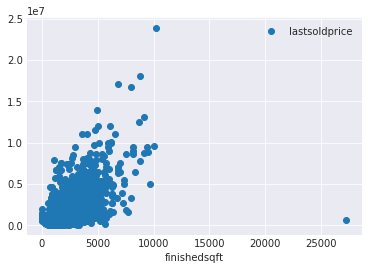

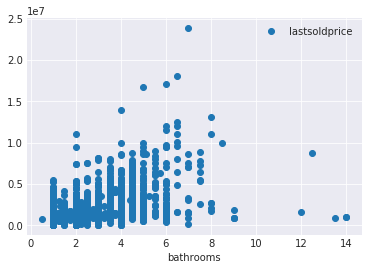

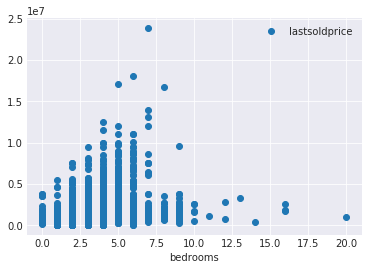

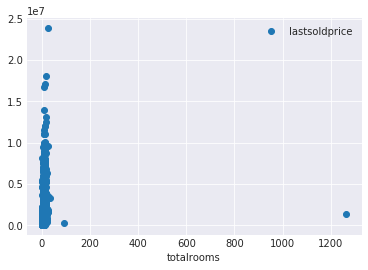

In [103]:
dff.plot(x='finishedsqft', y='lastsoldprice', style='o')
dff.plot(x='bathrooms', y='lastsoldprice', style='o')
dff.plot(x='bedrooms', y='lastsoldprice', style='o')
dff.plot(x='totalrooms', y='lastsoldprice', style='o')

Now let's perform a multivariate regression on those features

In [84]:
X = dff[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms']]
Y = dff['lastsoldprice']

X.head()


,bathrooms,bedrooms,finishedsqft,totalrooms
0,2.0,2.0,1043.0,4.0
1,1.0,1.0,903.0,3.0
2,4.0,3.0,1425.0,6.0
3,3.0,3.0,2231.0,10.0
4,3.0,3.0,1300.0,4.0


In [85]:
from sklearn.cross_validation import train_test_split

# Split data into test and training set. Use random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
y_pred = regressor.predict(X_test)
print('Linear Regression coefficient of determination (R squared): %.4f' % regressor.score(X_test, y_test))

Linear Regression coefficient of determination (R squared): 0.2947


In [105]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

Linear Regression RMSE: 781689.8603
